# Numerical Integration: Part I
&copy; Hung-Jen Wang (wangh@ntu.edu.tw), 2022 


The type of integration that we often encounter may fit the general form of

$$\begin{aligned}
I = \int_a^b p(x) f(x) dx,
\end{aligned}$$

where $p(x)$ is a nonnegative function which is often referred to as the *weight function*. For example, $p(x)$ could be the probability density function of a continuous random variable $X$ with the support $[a,b]$, such that $I=E[f(x)]$ is the expected value of $f(X)$. In some applications, $p(x)$ may not bear the interpretation of probability or be naturally understood as weights. That's fine. For instance, we could have $p(x)=1$, so that $I$ is the area under the $f(x)$ function between $a$ and $b$. 

Some integrals cannot be computed analytically, so we need to evaluate them numerically.

## Warm-up: Basic Rules for Numerical Approximation of Definite Integrals

Let us use a simple example to illustrate the basic idea of numerical integrations. Given an interval $[a,b]$ and a function $g(x) = \frac{1}{1+x}$, we would like to find the area under the curve over $[2,20]$:

$$\begin{aligned}
 I = \int_a^b g(x) d x =  \int_2^{20} \frac{1}{1+x} dx.
\end{aligned}$$

$I$ in this example has a closed-form solution which is $I = \log(7) \approx 1.9459101490553132$; we are going to numerically evaluate the integral anyway.

Let's plot $g(x)$ to get a visual on the curve. 

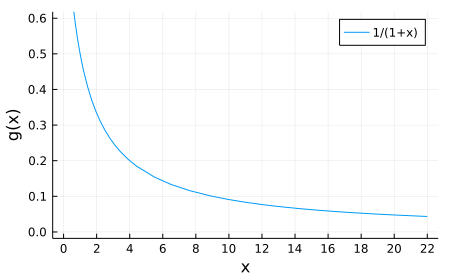

In [3]:
using LaTeXStrings, Plots

g(x) = 1/(1+x)

plot(g, xticks=0:2:22, xlim=[0,22], ylim=[0, 0.6], size=(450, 280), 
     label="1/(1+x)", xlabel="x", ylabel="g(x)")

We'll first introduce a few simple methods, all of which are based on the idea of slicing the area under the curve into smaller pieces in the hope that each piece would be a good approximation of the corresponding area under the nonlinear curve. The integral is then the sum of these pieces.

To fix idea, let's say that we divide $[2,20]$ into equally spaced intervals with the nodes of $[2,4,6,8,10,12,14,16,18,20]$. Using the nodes we may form 9 non-overlapping intervals of $[2,4]$, $[4,6]$, $\ldots$, and $[18,20]$. The following three simple methods, namely the forward rectangular rule, the midpoint rule, and the trapezoid rule, all evaluate the area defined by the 9 intervals under the curve. They differ in how each of the interval-area is calculated.


###  Forward Rectangular Rule

In the forward rectangle rule (also called the left-hand rectangle rule), we use the *left* endpoint of an interval to calculate the corresponding rectangles of the interval. The size of the first rectangle is $(4-2)g(2) = (4-2)\frac{1}{1+2}$ and the second one is $(6-4) g(4) = (6-4)\frac{1}{1+4}$, and so on. Therefore, the integral is evaluated as 


$$\begin{aligned}
I = \int_2^{20}\frac{1}{1+x}dx  \approx  (4-2)\frac{1}{1+2} + (6-4)\frac{1}{1+4} + \ldots,                             
\end{aligned}$$
Or, more generally,
$$\begin{aligned}
I = \int_a^{b} g(x) dx \approx & \sum_{i=1}^n \omega_i  g(\xi_i) \\
 = & \frac{b-a}{n} \sum_{i=1}^n g(\xi_i),
\end{aligned}$$

where in our example $[a,b]=[2,20]$, $n=9$,  $\omega_i= (b-a)/n =2$ is the length of the interval, and $\{\xi_i\} = \{2,4,6,8,10,12,14,16,18 \}$.

>Because we use only one point to interpolate a given interval (e.g., $\xi_1=2$ of the first interval), we say the rule uses a _**single interpolation point**_ in the approximation. 
>
> In the above, we repeatedly apply the rule to all the sub-intervals within the domain, and so the method may be described as the _**composite**_ forward rectangular rule.
>
> The same use of terminology applies to the following rules introduced in the section.

As shown in the following figure, the integral is evaluated as the sum of these rectangles.

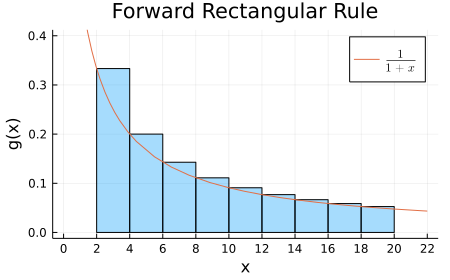

weights = [9.0, 9.0]
nodes = [2.0, 11.0]
rule = [(9.0, 2.0), (9.0, 11.0)]


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "2", "val" => 1, "id" => "idEFGPeTpd"), OrderedDict{String, Any}("key" => "3", "val" => 2, "id" => "idmJD3NO2I"), OrderedDict{String, Any}("key" => "6", "val" => 3, "id" => "idV74Gs7CX"), OrderedDict{String, Any}("key" => "9", "val" => 4, "id" => "idUR3pI2dz"), OrderedDict{String, Any}("key" => "18", "val" => 5, "id" => "idCvA5Vt9T"), OrderedDict{String, Any}("key" => "36", "val" => 6, "id" => "idgvmOZPyL"), OrderedDict{String, Any}("key" => "90", "val" => 7, "id" => "idBX2CVsSF"), OrderedDict{String, Any}("key" => "180", "val" => 8, "id" => "idYf5nZANY")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000082da0200, Task (runnable) @0x0000000082da0200), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].in

weights = [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
nodes = [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0]
rule = [(2.0, 2.0), (2.0, 4.0), (2.0, 6.0), (2.0, 8.0), (2.0, 10.0), (2.0, 12.0), (2.0, 14.0), (2.0, 16.0), (2.0, 18.0)]
weights = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
nodes = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]
rule = [(1.0, 2.0), (1.0, 3.0), (1.0, 4.0), (1.0, 5.0), (1.0, 6.0), (1.0, 7.0), (1.0, 8.0), (1.0, 9.0), (1.0, 10.0), (1.0, 11.0), (1.0, 12.0), (1.0, 13.0), (1.0, 14.0), (1.0, 15.0), (1.0, 16.0), (1.0, 17.0), (1.0, 18.0), (1.0, 19.0)]


In [9]:
using Interact, WebIO, StatsPlots

legend1 = LaTeXStrings.LaTeXString("\$\\frac{1}{1+x}\$")
g(x) = 1/(1+x)
true_value = 1.9459101490553133051053527434432

w_i = 3:2:19 
g_i = @.g(w_i-1)
bar(w_i, g_i, xticks=0:2:22, bar_width=2, fillalpha = 0.35, label="")
plot!(g,xlim=[0,22], ylim=[0.0,0.4], xlabel="x", ylabel="g(x)", title="Forward Rectangular Rule",  
    label=legend1, size=(450,280)) |> display


@manipulate for n in (2, 3, 6, 9, 18, 36, 90, 180)  
# @manipulate for n in 1:90
    step = (20-2)/n;
    w_i = 2+step/2:step:20-step/2; 
    g_i = g.(w_i .- step/2);
    res1 = step*sum(g_i)
    err1 = res1 - true_value
    
    weights = fill(step, n);
    nodes = collect(w_i .- step/2);
    rule = collect(zip(weights, nodes));
    @show weights
    @show nodes
    @show rule
    
    bar(w_i, g_i, xticks=0:2:22, bar_width=step, fillalpha = 0.35, label="area=$(res1)\n  err=$(err1)")
    plot!(g, xlim=[0, 22], ylim=[0.0, 0.4], xlabel="x", ylabel="g(x)", title="Forward Rectangular Rule",  
        label="", size=(650,380))
end   

### Midpoint Rule

As you can see from the graph of the rectangular rule, the rectangle on the far left has the worse approximation about the area under the curve. In general, the forward rectangular rule may not work well in places where the curve is steep.

The *midpoint rule* mitigates the problem. This rule also uses a single interpolation point, but the point is taken as the middle point of the two endpoints of the interval so as to compromise the (large) drop of function values between the endpoints. Following from the above example, the first rectangle is thus evaluated by $(4-2)*g((4+2)/2) = (4-2)*\frac{1}{1+(4+2)/2}$ . Here, $\frac{4+2}{2}$ is the midpoint between 2 and 4. In general,

$$\begin{aligned}
I = \int_a^b g(x) dx \approx & \sum_{i=1}^n \omega_i  g(\tilde{\xi}_i) \\
 = &  \frac{b-a}{n} \sum_{i=1}^n g(\tilde{\xi}_i),
\end{aligned}$$

where in our example $[a,b]=[2,20]$, $n=9$,  $\omega_i= (b-a)/n =2$ is the length of the interval, and $\{\tilde{\xi}_i\} =\{(\xi_i + \xi_{i+1})/2\} = \{3,5,7,9,11,13,15,17,19 \}$.

This rule also uses a single interpolating point, such as $\tilde{\xi}_i = 3$ of the first interval.

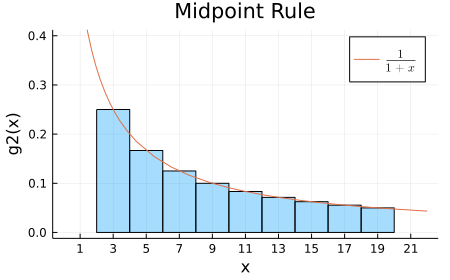

weights = [9.0, 9.0]
nodes = [6.5, 15.5]
rule = [(9.0, 6.5), (9.0, 15.5)]


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "2", "val" => 1, "id" => "idZ9YP9m5b"), OrderedDict{String, Any}("key" => "3", "val" => 2, "id" => "idhYzAlXMb"), OrderedDict{String, Any}("key" => "6", "val" => 3, "id" => "id7XLyu1mM"), OrderedDict{String, Any}("key" => "9", "val" => 4, "id" => "idPD9TVjiU"), OrderedDict{String, Any}("key" => "18", "val" => 5, "id" => "idoy1VM26B"), OrderedDict{String, Any}("key" => "36", "val" => 6, "id" => "idCplI24db"), OrderedDict{String, Any}("key" => "90", "val" => 7, "id" => "idExz6B1KR"), OrderedDict{String, Any}("key" => "180", "val" => 8, "id" => "id9Ql77yRD")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000074e3c9c0, Task (runnable) @0x0000000074e3c9c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].in

weights = [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
nodes = [3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0]
rule = [(2.0, 3.0), (2.0, 5.0), (2.0, 7.0), (2.0, 9.0), (2.0, 11.0), (2.0, 13.0), (2.0, 15.0), (2.0, 17.0), (2.0, 19.0)]


In [11]:
g2(x) = 1/(1+x)
true_value = 1.9459101490553133051053527434432

x_i = 3:2:19
g_i = g2.(x_i)

bar(x_i, g_i, xticks=1:2:21, bar_width=2, fillalpha = 0.35, label="")
plot!(g2, xlim=[0,22], ylim=[0.0,0.4], title="Midpoint Rule", size=(450, 280), 
    label=legend1, xlabel="x", ylabel="g2(x)") |> display


@manipulate for n in (2, 3, 6, 9, 18, 36, 90, 180)  
    step = (20-2)/n
    x_i = 2+step/2:step:20-step/2
    g_i = g2.(x_i)    
    res2 = step * sum(g_i)
    err2 = res2 - true_value

    weights = fill(step, n);
    nodes = collect(x_i);
    rule = collect(zip(weights, nodes));
    @show weights
    @show nodes
    @show rule      
    
    bar(x_i, g_i, xticks=1:1:21, bar_width=step, fillalpha = 0.35, label="area=$(res2)\n  err=$(err2)")
    plot!(g2, xlim=[0,22], ylim=[0.0,0.4], title="Midpoint Rule", size=(650, 380), 
        label="", xlabel="x", ylabel="g2(x)")    
end    


### Trapezoidal Rule

The rectangular rule and the midpoint rule evaluate the rectangle use only a *single* interpolation point to calculate the area of a rectangle. We can certainly use more than one point to interpolate the area of a given interval, although the result may not always be better. The trapezoidal rule is an example, where it takes both of the endpoints of the interval to evaluate the area, as follows:

$$\begin{aligned}
I = \int_a^b g(x) dx \approx & \sum_{i=1}^n \omega_i \frac{ g(\xi_i) + g(\xi_{i+1})}{2} \\
= &  \frac{b-a}{n} \sum_{i=1}^n \frac{ g(\xi_i) + g(\xi_{i+1})}{2},
\end{aligned}$$

where in our example $[a,b]=[2,20]$, $n=9$,  $\omega_i= (b-a)/n =2$ is the length of the interval, and $\{\xi_i\} = \{2,4,6,8,10,12,14,16,18 \} $. You are encourage to figure out the geometric representation of this rule.

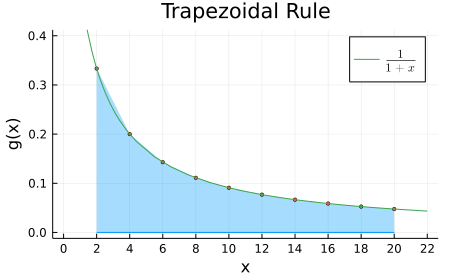

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "2", "val" => 1, "id" => "idEqsq05e9"), OrderedDict{String, Any}("key" => "3", "val" => 2, "id" => "idczB5Xe6S"), OrderedDict{String, Any}("key" => "6", "val" => 3, "id" => "id2E1sViZB"), OrderedDict{String, Any}("key" => "9", "val" => 4, "id" => "idhq8CcvAG"), OrderedDict{String, Any}("key" => "18", "val" => 5, "id" => "idGqFApIWQ"), OrderedDict{String, Any}("key" => "36", "val" => 6, "id" => "idY0z1iYlM"), OrderedDict{String, Any}("key" => "90", "val" => 7, "id" => "idX1luuGso"), OrderedDict{String, Any}("key" => "180", "val" => 8, "id" => "idbEgo11hj")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008234d940, Task (runnable) @0x000000008234d940), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].in

In [12]:
g3(x) = 1/(1+x)
true_value = 1.9459101490553133051053527434432

w_i = 2:2:20
g_i = @.g3(w_i)

plot(w_i, zeros(length(w_i)), fillrange=g_i, fillalpha = 0.35, label="")
plot!(w_i, g_i, xticks=0:2:22, shape=:circle, markersize=2, label="", seriestype = :scatter)
plot!(g3, xlim=[0, 22], ylim=[0.0, 0.4], title="Trapezoidal Rule", size=(450, 280), 
      label=legend1, xlabel="x", ylabel="g(x)") |> display


@manipulate for n in (2, 3, 6, 9, 18, 36, 90, 180)  
    step = (20-2)/n
    w_i = 2:step:20 
    g_i = @.g3(w_i)
    g_i2 = [g_i[j] for j in 2:n+1]
    res3 = (step/2)*sum(g_i[1:n] .+ g_i2)
    err3 = res3 - true_value    
    plot(w_i, zeros(length(w_i)), fillrange=g_i, fillalpha = 0.35, label="area=$(res3)\n  err=$(err3) ")
    plot!(w_i, g_i, xticks=0:2:22, shape=:circle, markersize=2, label="", seriestype = :scatter)
    plot!(g3, xlim=[0, 22], ylim=[0.0, 0.4], title="Trapezoidal Rule",  
       label="", xlabel="x", ylabel="g(x)")
end   

### A Few Remarks

- You may have noticed the somewhat surprising fact that the midpoint rule is actually twice as accurate as the trapezoidal rule, meaning that the error of the former is about half of the latter's error. This fact is directly observed from the numerical examples above and it can also be proved mathematically. Note also that the two rules' errors have the opposite signs. 
- We can exploit this property by combining these two methods (in such a way that errors from the methods would cancel out each other) to achieve much more efficient algorithms. In fact, the _**Simpson's rule**_ can be interpreted as the combination of the midpoint and the trapezoidal rules and is thus more efficient.

- The (composite) _**Simpson's rule**_ uses three interpolating points, which may be expressed as:
$$\begin{aligned}
I = \int_a^b f(x) dx \approx   \frac{b-a}{6n} \sum_{i=1}^n \left[ f(\xi_i) + 4f\left(\frac{\xi_i + \xi_{i+1}}{2}\right) + f(\xi_{i+1}) \right].
\end{aligned}$$ 
  - It uses three points to interpolate a given interval: $\xi_i, (\xi_i + \xi_{i+1})/2$, and $\xi_{i+1}$.
  - The coefficients (or, _**weights**_) of these three points are $\frac{b-a}{6n}$, $\frac{2(b-a)}{3n}$, and $\frac{b-a}{6n}$, which can be shown as the roots of an approximating polynomials.
  - It is interesting to note that the result of the Simpson's rule using $n$ nodes ($I^{S(n)}$) is the weighted average of the results from the trapezoidal rule and the midpoint rule both using $n/2$ nodes. That is,
$$\begin{aligned}
I^{S(n)} = \frac{1}{3}I^{T\left(\frac{n}{2}\right)} + \frac{2}{3}I^{M\left(\frac{n}{2}\right)}.
\end{aligned}$$

In [27]:
using Interact, WebIO, StatsPlots

# Simpson's Rule; classroom exercise

g4(x) = 1/(1+x)
true_value = 1.9459101490553133051053527434432

@manipulate for n in  (2, 3, 6, 9, 18, 36, 90, 180)   # number of segments
    a, b= 2, 20
    step = (b-a)/n     # length of one segment
    x = [a:step:b;]    # points that divide the segments
    width = [(b-a)/(6n), 2(b-a)/(3n), (b-a)/(6n)] # coefficients of the 3 points = width of bars   
    ω = repeat(width, outer=n)  # width of bars, spread to all segments
  
    start  = repeat(x[1:n], inner=3)      # start of each segment (each seg has 3 bars); don't need the last elem of x
   
    bar_dist = repeat([0.5*width[1], width[1]+0.5*width[2], width[1]+width[2]+0.5*width[3]], outer=n) # mid of bar measured from the beginning of segment
    bar_mid  = start .+ bar_dist          # mid of each bar, for plotting purposes
 
    ξ_dist = repeat([0, width[1]+0.5*width[2], width[1]+width[2]+width[3]], outer=n) # ξ measured from the beginning of segment
    ξ      = start .+ ξ_dist    # the ξ in the formula    
 
    g_height = g4.(ξ)           # the height of the bar

    res = sum(ω .*  g4.(ξ))    # the area = solution
    err = res - true_value      
    
    rule = collect(zip(ω, ξ));
    @show ω
    @show ξ
    @show rule
    
    bar(bar_mid, g_height, xticks=1:1:21, bar_width=ω, fillalpha=0.35, label="area = $res\n  err = $err")  # bar plot
    plot!(g4, xlim=[0, 22], ylim=[0.0, 0.4], title="Simpson's Rule", label="", xlabel="x", ylabel="g(x)")  # plot g4
    scatter!(ξ, g4.(ξ), label=false) # highlight the dividing points
end    

ω = [1.5, 6.0, 1.5, 1.5, 6.0, 1.5]
ξ = [2.0, 6.5, 11.0, 11.0, 15.5, 20.0]
rule = [(1.5, 2.0), (6.0, 6.5), (1.5, 11.0), (1.5, 11.0), (6.0, 15.5), (1.5, 20.0)]


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "2", "val" => 1, "id" => "idxR07pqRn"), OrderedDict{String, Any}("key" => "3", "val" => 2, "id" => "idKeuMz895"), OrderedDict{String, Any}("key" => "6", "val" => 3, "id" => "idbSSx06EZ"), OrderedDict{String, Any}("key" => "9", "val" => 4, "id" => "idNV8DyARI"), OrderedDict{String, Any}("key" => "18", "val" => 5, "id" => "id2czHINVa"), OrderedDict{String, Any}("key" => "36", "val" => 6, "id" => "id5IzMVsC8"), OrderedDict{String, Any}("key" => "90", "val" => 7, "id" => "id2JSbQeB0"), OrderedDict{String, Any}("key" => "180", "val" => 8, "id" => "idjucubgBN")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007d1cc7d0, Task (runnable) @0x000000007d1cc7d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].in

## Quadrature Methods

The above methods are intuitive and nothing fancy. They, in fact, belong to a larger family of integration methods with a fancier name: the _**quadrature methods**_. The method uses a set of particularly-designed points (*weights* and *nodes*) to evaluated the function and to approximate the integration. Different types of integration problems may require different sets of points, which are in turn derived using different polynomials proposed for particular type of problems. The quadrature methods are also called _**polynomial integration methods**_.

Very often, the term _**quadrature rule**_ simply refers to the vector of points that are used to evaluate the integrand. We will introduce a few often-used *rules* for some commonly encountered integration problems.

In general, the quadrature-rule based integration approximation takes the following form:

$$\begin{aligned}
 I = \int_a^b p(x)f(x) dx \approx \sum_{i=1}^n \omega_i f(\xi_i),
\end{aligned}$$

where $\omega_i$ are **weights** and $\xi_i$ $\in [a,b]$ are **nodes** (or, **abscissas**); $i=1,\ldots,n$. Here, the "quadrature rule" would refer to the vector of notes and weights.
-  $p(x)$ and $\omega_i$ are not the same thing; the former is a (usually-positive) function and the latter is a positive numeric obtained from a formula (more on this later).
-  $p(x)$ is part of the integrand but it does not appear on the RHS of the apoximation formula.
- The rule $\{\omega_i, \xi_i\}$, $i=1,...,n$, are independent of the $f(\cdot)$. In other words, given a rule, the set of $\{\omega_i, \xi_i\}$ is not problem-specific.


In our previous example, $[a,b] = [2,20]$, $p(x)=1$, $f(x) = \frac{1}{1+x}$, $\omega_i=2$, and $\xi_i$ is the endpoint (the forward rectangular rule) or the middle point (the midpoint rule) of the intervals. So we note two things here: 
- The simple methods introduced earlier fit into the quadrature framework.
- We could use different $\{\omega_i, \xi_i \}$ combinations (e.g., those used in the rectangular rule vs. those used in the midpoint rule) to compute the integral, and the choice bears results on the efficiency and accuracy of the computation. 

The essence of the quadrature method is in selecting $\{\omega_i, \xi_i\}$, $i=1,\ldots,n$ (i.e., the *rule*) so that the above approximation equation is accurate and efficient. It turns out that the appropriate $\{\omega_i, \xi_i \}$ depends on the type of integration problem at hand, where **the *type* is often jointly determined by the domain ($[a,b]$) and weight function ($p(x)$) of the problem**. Various numerical algorithms are developed for computing $\{\omega_i, \xi_i \}$ with respect to different domain & weight-function combinations. 

There are different ways of thinking regarding how the $\{\omega_i, \xi_i \}$ is designed. The **Newton-Cotes** method chooses to pick the best $\omega_i$s while opting for the simpler, equal-spaced (equidistant) $\xi_i$. The **Gaussian quadrature** method lets go the simplicity and strive to pick the best $\omega_i$ *and* $\xi_i$. By this method, $\{ \xi_i \}$ is obtained by solving specially designed ("quadrature rule") *orthogonal polynomials* and $\{ w_i \}$ is then obtained from a formula which is a function of $\{ \xi_i \}$.


### Newton-Cotes method: a brief remark

We will only make a few remarks regarding the Newton-Cotes method.

- The rectangular rule, the midpoint rule, the trapezoidal rule, and the Simpson's rule can be regarded as special cases of the Newton-Cotes method. 
  - They all use equal-spaced nodes.
  - The *weight* used in these rules, which equals 2 in our case of the rectangular, midpoint, and the trapezoidal rules, is intuitively optimal and can be approved as so.

- The coefficients (or, _**weights**_) in the Simpson's rule ($\frac{b-a}{6n}$, $\frac{2(b-a)}{3n}$, and $\frac{b-a}{6n}$) are determined as the roots of a **quadratic Lagrange interpolating polynomial** which is designed to best fit the curve using three points.

- The simple rules we show here all have equal-spaced nodes, and the Simpson's rule provides an intuitive example of how the optimal weights are determined. 

### Gaussian Quadrature Rules

Various Gaussian quadrature rules are developed for different types of integrals, where the types are often manifested in the $[a,b]$ and $p(x)$ combinations. **For a given number of nodes ($n$), different rules produce different sets of $\{\omega_i, \xi_i\}$, $i=1,\ldots,n$**, which are obtained from roots of rule-specific polynomials (for $\xi_i$) and the corresponding formulas (for $\omega_i$). 

These polynomials and weight formulas are designed such that **$n$ quadrature nodes would integrate a polynomial of degree $2n-1$ exactly**. That is, if the integrand can be represented exactly as a polynomial of degree up to $2n-1$, applying an appropriate Gaussian rule using $n$ nodes would give you the exact answer. We will use an example to demonstrate the claim. We should note, however, that **many (density) functions we are likely to encounter are not polynomials**, and therefore the result from applying the Gaussian rules remains an approximation. Nevertheless, because smooth functions can well be approximated by polynomials of sufficient order, the Gaussian quadratures could often provide remarkably precise approximations.

>> **Polynomials:** In mathematics, a polynomial is an expression consisting of indeterminates (also called variables) and coefficients, that involves only the operations of addition, subtraction, multiplication, and non-negative integer exponentiation of variables.


Recall we have the quadrature-rule based integration approximation in the form of:

$$\begin{aligned}
 I = \int_a^b p(x)f(x) dx \approx \sum_{i=1}^n \omega_i f(\xi_i).
\end{aligned}$$

The common types of rules are in the following table.

!["hello"](data/table_0.png)

Which rule should we use? To a large extent, it depends on the type of problems at hand, that is, the domain and the weight function combination; there are other issues to consider and we'll discuss them later. **Once we pick the rule (perhaps after transforming the original problem via change of variables to fit precisely the rule's type), we use the rule's polynomials to solve for $\{\omega_i, \xi_i \}$.** Let's use the Gauss-Legendre rule as an example:
- Given $n$, the nodes $\{\xi_i\}$ are solved recursively from the $n$-th order Legendre polynomial: $(n+1)P_{n+1}(\xi) = (2n+1)\xi P_n(\xi) - n P_{n-1}(\xi)$. 
- Some normalization is required, such as $P_0(\xi)=1$, $P_1(\xi)=\xi$. 
- After we get $\{\xi_i \}$, the weights $\{\omega_i\}$ may be calculated from the formula $\omega_{i}={\frac {2}{\left(1-\xi_{i}^{2}\right)\left[P'_{n}(\xi_{i})\right]^{2}}}$.
- There are different ways to compute the nodes and the weights. For instance, they can be obtained as the eigenvalues and eigenvectors of a specially designed matrix (Golub and Welsch 1960, Mathematics of Computation).

Different quadrature rules have different polynomials (for $\xi_i$) and use different weight formulas (for $\omega_i$). In this lecture, we will not go into details of those polynomials and formulas. Many computer programs provide $\{\omega_i, \xi_i \}$ for a given rule. We draw some graphs of weights and nodes to get an idea.

In [28]:
using FastGaussQuadrature, Interact, WebIO, StatsPlots

pt_range = 1:200
y_upper_range = 0:0.1:1
  
@manipulate for y_upper in y_upper_range, pt in pt_range       
    # xi, wi = gausslegendre(pt); mylab = "Gauss-Legendre Rule";  x_lower = -1.5; x_upper=1.5; 
    # xi, wi = gausshermite(pt); mylab = "Gauss-Hermite Rule";  x_lower = -20; x_upper=20; 
      xi, wi = gausslaguerre(pt); mylab = "Gauss-Laguerre Rule";  x_lower = 0; x_upper=40; 
    
    plot(xi, wi, shape=:circle, markersize=3, seriestype=:scatter, size=(450, 280),
         xlabel="nodes", ylabel="weights", title=mylab, label="", xlimit=[x_lower, x_upper ], ylimit=[0, y_upper])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["y_upper"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 11, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
6, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\King\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\King\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008234d180, Task (runnable) @0x000000008234d180), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"3840611014245647625\",\"id\":\"438021980210404972\",\"type\":\"observ

Now let us see examples of how to use the Gaussian quadrature methods to do numerical integrations. Before we begin, let's remind ourselves of the change of variables.

>##### Change of Variables
>    
>If $x = \rho(t)$, then
>$$\begin{aligned}
 \int_a^b g(x) dx = \int_{\rho^{-1}(a)}^{\rho^{-1}(b)} g(\rho(t)) \rho'(t) dt,
\end{aligned}$$
>where $\rho'(t)$ is the Jacobian.

What is Jacobian? Let's refresh our memory:

>##### Gradient, Hessian, and Jacobian
> - **Gradient:** Vector of first order derivatives of a scalar valued function $f$ where $f$ is from $\mathbb{R}^n \rightarrow \mathbb{R}$.
>   - $f(x,y) = x^2 + xy$, gradient = $(2x+y, x)$.
> - **Hessian:** Matrix of second order mixed partials of a scalar valued function $f$ where $f$ is from $\mathbb{R}^n \rightarrow \mathbb{R}$.
>    - $f(x,y) = x^2 +xy$, Hessian is:
>      \begin{bmatrix}
        2, 1 \\
        1, 0
        \end{bmatrix}
> - **Jacobian:** Matrix of gradients for components of a vector valued function $f$ where $f$ is from $\mathbb{R}^n \rightarrow \mathbb{R}^m$.
>    - $f(x,y) = (x^2 + xy, x^3 - 2xy)$, the Jacobian is
>    \begin{bmatrix}
      2x+y, x\\
      3x^2-2y, -2x
      \end{bmatrix}






#### Gauss-Legendre Quadrature Rule

The Gauss-Legendre rule is perhaps the most commonly used Gaussian quadrature rule, so **sometime this rule is simply referred to as *the* Gauss quadrature rule**. Let's look at its general form:

$$\begin{aligned}
 I = \int_a^b g(x) d x.
\end{aligned}$$

Let's assume $[a,b]$ are finite numbers and $g(x)$ is smooth without discontinuity or singularity in the domain. In our previous example, $[a,b] = [2,20]$ and $g(x) = 1/(1+x)$; we'll come back to this example later. If we would apply the Gauss-Legendre rule to the problem, we need to make a change of variables so that $[a,b]$ is mapped to $[-1,1]$.

`這個叫transformation Rule`

For a finite domain $[a,b]$, we may use a simple linear transformation to map the domain to $[-1,1]$. For instance,

$$\begin{aligned}
  & x = \rho(t)  =  \frac{a+b}{2} + \frac{b-a}{2}t,\\
 \mathrm{or},\quad & t = \rho^{-1}(x) = \frac{2x - b - a}{b-a}.
\end{aligned}$$

`這個叫Jacobian`

Verify this yourself: When $x=a \ \Rightarrow t=-1$, and when $x=b \ \Rightarrow t=1$. In this way, $x \in [a,b]$ corresponds to $t \in [-1, 1]$. Here the Jacobian is $ \rho'(t) =\frac{\partial \rho(t)}{ \partial t} = \frac{1}{2}(b-a)$. After the transformation, we can then re-write the integral:

$$\begin{aligned}
  I = \int_a^b g(x) dx & = \int_{-1}^1 g\left( \frac{1}{2}[ (b+a) + (b-a)t ] \right) \frac{b-a}{2}dt.
\end{aligned}$$

The formulation now fits the Gauss-Legendre form with the domain being $[-1,1]$ and

$$\begin{align}
f(t) =  g\left( \frac{1}{2}[(b+a) + (b-a)t ] \right) \frac{b-a}{2}.
\end{align}$$

We can then go ahead to obtain $\{\omega_i, \xi_i \}$ from the Gauss-Legendre rule and apply the rule to approximate the integral:

$$\begin{aligned}
I  \approx \sum_{i=1}^{n} \omega_i \cdot f( \xi_i ) .
\end{aligned}$$

In our previous example, $p(x)=1$, $g(x) = \frac{1}{1+x}$ and $[a,b] = [2,20]$, so we have

$$\begin{aligned}
I \approx  \sum_{i=1}^{n} \omega_i \cdot  \frac{1}{1+ \frac{1}{2}[(20+2) + (20-2)\xi_i ]}\left( \frac{20-2}{2} \right).
\end{aligned}$$


In [6]:
using FastGaussQuadrature

a = 2; b=20
n=30

g(x) = 1/(1+x)
trans_rule(t) = (a + b)/2 + t*(b-a)/2
jacobian = (b-a)/2

f(t) = g( trans_rule(t) ) * jacobian  # could use `x` instead of `t`; re-use the name to save memory

xi, wi = gausslegendre(n)      # note the nodes and weights position
answer = sum( wi.* f.(xi))

1.9459101490553117

In [4]:
# check with Julia's built-in function

using QuadGK
quadgk(x-> 1/(1+x), 2, 20, rtol=1e-8)

(1.9459101490553135, 1.1735457605688282e-9)

##### Another Example 

Recall that the $n$-point Gaussian rule would be exact for polynomials of degree $2n-1$. Let's consider the following problem:

$$\begin{align}
 I = \int_{-1}^{1} 1 + x + x^2 dx.
\end{align}$$ 

This problem fits the Gauss-Legendre form and the integrand is a polynomial of degree 2. In fact, this problem has a closed form solution which is $8/3 \approx 2.66667$. 

According to what we have just stated, any $n \geq 2$ should yield the exact answer for this problem. Let's see if this is true. First, let's draw the a graph for the integration problem.

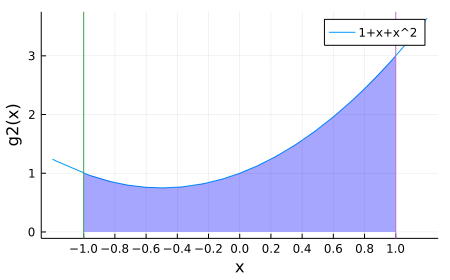

In [29]:
g2(x) = 1+x+x^2  

plot(g2, xticks=-1:0.2:1, size=(450, 280),
     label="1+x+x^2", xlabel="x", ylabel="g2(x)", xlim=[-1.2,1.2])

plot!(g2,  xlim=[-1,1], fill=(0,0.35), fillalpha=0.35, color=:blue, label="", linecolor = :transparent)


vline!([-1 1], label="", xlim=[-1.2,1.2])

Now let's use the Gauss-Legendre rule to calculate the value of the integration. We'll start from $n=1$ and go up to $n=10$.

In [32]:
using FastGaussQuadrature

g2(x) = 1 + x + x^2

answer = zeros(10)
for n in 1:10
  xi, wi = gausslegendre(n)
  answer[n] = sum( wi .* g2.(xi))
end

answer

10-element Vector{Float64}:
 2.0
 2.666666666666667
 2.666666666666667
 2.666666666666667
 2.666666666666667
 2.6666666666666665
 2.6666666666666683
 2.6666666666666687
 2.666666666666666
 2.666666666666668

As you can see, **for any $n\geq 2$, the answer can be considered exact**. This result can be proved by algebra so there is nothing ambiguity here. However, it may still be somewhat surprising to you *if* you try to understand the result from the interpolation point of view. ("*How could the area under the curve we pictured above be interpolated using only 2 points?*") Interpolation technique is what we have done with the rectangular, the midpoint, and the trapezoidal methods. We should emphasize that _**the Gaussian quadrature rules are not interpolation methods**_. Nevertheless, for the sake of curiosity and for polishing your graphing skills, let's graph the following things:
- Assume $n=4$. At the grid point of $\xi$, $i=1,\ldots,n$, plot bar chart using $f(\xi)$ as the height and $w_i$ as the width.
- Overlay the bar chart on the curve of $1+x+x^2$.

## 0323 課堂練習（undone）

4×2 Matrix{Float64}:
 0.347855  -0.861136
 0.652145  -0.339981
 0.652145   0.339981
 0.347855   0.861136

The integral is evaluated to be: 2.666666666666667.

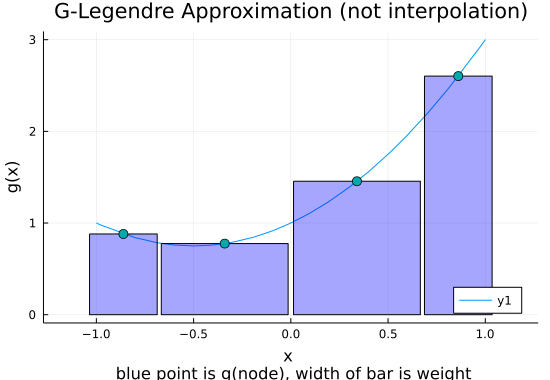

In [34]:
using FastGaussQuadrature
...

#### Gauss‑Hermite Quadrature Rule

For integrals of the form

$$\begin{aligned}
 \int_{-\infty}^{\infty} e^{-x^2} f(x) dx,
\end{aligned}$$

the Gauss-Hermite quadrature of order $n$ provides $\{\omega_i, \xi_i \}$ for the following approximation:

$$\begin{aligned}
 I = \int_{-\infty}^{\infty} e^{-x^2} f(x) dx \approx \sum_{i=1}^n \omega_i f(\xi_i).
\end{aligned}$$

Note that $e^{-x^2}$ (which is regarded as the weight function $p(x)$ in the general notation) is not on the right-hand-side of the approximation formula. Instead, we have the weights $\omega_i$s on the RHS.

The **Gauss-Hermite quadrature is often used in problems involving normal random variables**. It is because a standard normal random variable $z\sim N(0,1)$ has the density function of

$$\begin{aligned}
 d(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}z^2},
\end{aligned}$$

where the part of $e^{-\frac{1}{2}z^2}$ is close to the weight function of the rule (by defining $x = \frac{1}{\sqrt{2}}z$). By using the change of variables, we may transform the problem involving normal random variables into the form that fits the Gauss-Hermite rule. This approach is particularly feasible if the domain is in $[-\infty, \infty]$ since the latter is not likely to be affected by the change of variables and so the Gauss-Hermite rule still applies after the change of variables.

What if the integration has an infinite domain but the integrand simply does not have an exponential function? We just need to re-define the integrand. For instance, consider the following problem:

$$\begin{aligned}
I = \int_{-\infty}^{\infty} g(x) dx = \int_{-\infty}^{\infty} \ln(1 + e^{-x}) dx.
\end{aligned}$$

We may define $f(x) = e^{x^2} \ln(1 + e^{-x})$ and so the problem becomes

$$\begin{aligned}
\int_{-\infty}^{\infty} \ln(1 + e^{-x}) dx = \int_{-\infty}^{\infty} e^{-x^2} e^{x^2}\ln(1 + e^{-x}) dx
 = \int_{-\infty}^{\infty} e^{-x^2} f(x) dx   \approx \sum_{i=1}^n \omega_i f(\xi_i).
\end{aligned}$$

where $\{\omega_i, \xi_i\}$, $i=1,\ldots,n$ is the Gauss-Hermite rule.



##### An Example

Let's see an example. Suppose we have a profit function $g(y)$ where $y$ is a random shock. Assume that $y \sim N(\mu, \sigma^2)$ is normally distributed with the probability density function $f(y)$ being:
\begin{aligned}
 f(y) = \frac{1}{\sigma\sqrt{2 \pi}} \exp\left( - \frac{1}{2} \left( \frac{y-\mu}{\sigma} \right)^2 \right).
\end{aligned}
What is $E[g(y)]$, the expected value of profit? We know, by definition,

$$\begin{aligned}
E[g(y)] = \int_{-\infty}^{\infty} g(y) f(y) dy = \int_{-\infty}^{\infty} g(y) \frac{1}{\sigma\sqrt{2 \pi}} \exp\left( - \frac{1}{2} \left( \frac{y-\mu}{\sigma} \right)^2  \right) dy.
\end{aligned}$$

The problem does not conform to the Hermite problem because the weighting function does not fit. At least two different methods could be used to solve the problem.

**The first method** is like what we've done in the past week: For a function $h(x)$, we can always define $k(x) = \exp(x^2)h(x)$ and apply the Gauss-Hermite rule to $k(x)$ to get the approximated value of integral of $h(x)$.

**The second method** is to use the change of variable to transform the problem. The transformation we use here is

!["hello"](data/formula_0.png)

Note that the transformation rule leaves $t=-\infty$ when $y=-\infty$ and $t=\infty$ when $y=\infty$, and so the domain is still at $[-\infty, \infty]$. Here the Jacobian is $\rho'(t) = \sqrt{2}\sigma$. Then,

$$\begin{aligned}
 E[g(y)] & = \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}\sigma} g(y) \exp\left( -\frac{1}{2}\left(\frac{y-\mu}{\sigma}\right)^2 \right)dy \\
    & = \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}\sigma} g(\sqrt{2}\sigma t + \mu) \exp(-t^2)\sqrt{2}\sigma dt \\
    & = \int_{-\infty}^\infty  \exp(-t^2) \frac{1}{\sqrt{\pi}}g(\sqrt{2}\sigma t +\mu) dt \\
    & \equiv \int_{-\infty}^\infty  \exp(-t^2) f(t) dt.
\end{aligned}$$

The formulation now fits the Gauss-Hermite form with $\exp(-t^2)$ being the weight function. We can then obtain $\{\omega_i, \xi_i \}$ from the Gauss-Hermite rule, apply them to $f(t)$ and obtain the approximated integral of the problem:

$$\begin{aligned}
E[g(y)] \approx \sum_{i=1}^{n} \omega_i \cdot f(\xi_i) = \sum_{i=1}^{n} \omega_i \Big[\frac{1}{\sqrt{\pi}} g\left(\sqrt{2}\sigma \xi_i + \mu \right)\Big].
\end{aligned}$$

#### Gauss-Laguerre Qudrature Rule

###### each rule 的積分範圍和weight function不太一樣～
For integrals of the form

$$\begin{aligned}
I = \int_0^\infty e^{-x}f(x)dx,
\end{aligned}$$

the Gauss-Laguerre quadrature of order $n$ provides $\{\omega_i, \xi_i\}$ for constructing the following approximation:

$$\begin{aligned}
 I = \int_0^\infty e^{-x}f(x)dx = \sum_{i=1}^n \omega_i f(\xi_i).
\end{aligned}$$

### Which rule to use?


As we mentioned earlier, to a large extent the decision depends on the type of problems at hand, but it should also be noted that **multiple rules could be applied to approximate the same problem** so there is a choice. Multiple rules could be applied (separately, of course) to approximate the same problem because very often we could use the change of variables to transform a given problem into different types, and thus different rules may apply. **Some rules are more "general" (e.g., the Gauss-Legendre)** in the sense that many integration problems can be easily transformed into a particular type, and thus the rules apply. The ease-of-use makes the rule a good candidate **for developing a general-purpose computer program** that accepts all types of integration problems, makes a suitable transformation via a change of variables, and applies the Gaussian rules to do the approximation. 

However, the generality may come at the expense of efficiency: **If the integration problem is of a particular type, directly applying the type's rule is often more efficient (same precision with a smaller $n$)**. For example, if the integration problem involves density functions of normal or log-normal random variables, the Gauss-Hermite rule is more efficient. If the problem involves density functions of exponential, Chi-square, or Gamma distributions, the Gauss-Laguerre rule is more efficient. So if we have a particular problem at hand that requires efficiency (*faster*), we may want to use a program (or write our own programs) that is tailored to the problem.

We elaborate the view in the follows. First, let's recall the definition of _**proper integrals**_:
    
>A **proper integral** is a _**definite integral**_ whose integrand is _**continuous over the bounded domain of integration**_. For example,
>\begin{aligned}
\int_{-2}^3 (1+x) dx; \qquad \int_{1}^5 \frac{1}{(1+x^2)} dx.
\end{aligned}   
> Other integrals are considered _**improper integrals**_. For example, 
>
>$$\begin{aligned}
\int_0^\infty g(x) dx; \qquad \int_{-1}^1 \frac{1}{x} dx.
\end{aligned}$$   
>
>The first one is improper because of the infinite domain, and the second one is because of the singularity at $x=0$.
    

Among the Gaussian rules, the Gauss-Legendre (GL) rule is the most commonly used. It deals with proper integrals, and the simple weight function ($p(x)=1$) makes it easy to apply to all types of integrands (**any integrands can be treated as having $p(x)=1$**). The only requirement is that we need the domain in $[-1,1]$ in order to apply the GL rule. In fact, all sorts of domains ($[a, b]$, $[-\infty, \infty]$, $[a, \infty]$, $[-\infty, b]$ with $a$ and $b$ being finite numbers) can be transformed into $[-1,1]$ using a change of variables with some pre-defined formula. For example:

!["hh"](data/table_1.png)

Therefore, in a sense, a lot of the integration problems we commonly encounter can be transformed and approximated using the GL rule. Many software's general-purpose integration commands/functions use this approach (e.g., Julia's 
`quadgk()`). 

One thing to consider, however, is whether the GL rule provides the most efficient algorithm (same precision with a smaller $n$) for your problems. As you may have figured out, if the problem better fits the Gauss-Hermite (GH), Gauss-Laguerre (GLa), or other types, then you could have more efficient estimation by using the associated rules. The followings are some general observations.
 - If the problem's domain and weight function fit exactly the GH, GLa, or other types, use the rule of the type to gain efficiency.
 - If the problem's domain is $[-\infty, \infty]$ and it has an exponential function in the integrand, there is a good chance that you can do a change of variables to transform the exponential function to the weight function of the GH type *while leaving the domain unchanged*. Then the GH rule can be applied. For instance, $\int_{-\infty}^\infty \exp(-\frac{1}{3}x^2)g(x) dx$.

###### improper integrals with singularity

For improper integrals with singularity: If the singularity happens at $x=c$, then split the domain into $[a, c]$ and $[c,b]$ and apply the quadrature rules. `Quadrature points are never at the boundary so that $c$ is safe at the boundary.` We have a homework problem on this.

### 0330 做上週的練習

![SNOWFALL](data/practice_0.png)

In [3]:
## 張同學的解答
using FastGaussQuadrature, Plots
function I_GH(g::Function, n::Int64)
    f(x) = exp(x^2)*g(x) # 不是才寫 p(x) = exp(-x^2)? 怎麼這裏是 exp(x^2)？
    xi, wi = gausshermite(n)
    answer = sum(wi.*f.(xi))
    return answer
end
g(x) = exp(-1/3*(x^2))*sqrt(1+x^2)
I_GH(g, 30)

4.5638130088853694

## Adaptive Quadratures

Adaptive quadrature is also a quadrature-based integration method. It approximates the integral of a given function recursively until the result meets a pre-specified precision, the latter of which is given by choosing a tolerance for the integration error. If the approximation results in an error larger than the tolerance, the domain is divided into two equal sub-regions, and the same number of quadrature points is applied again within each of the sub regions. If the result still has a larger error, then a subdivision is applied to that sub region once more. The process continues until the approximation error is smaller than the chosen tolerance.

The idea of the recursive process is that the approximation error would be large if there are not enough quadrature points to approximate the integral. The problem is most likely to occur in regions where the function is steep or has large variations. Intuitively, more points would be required to evaluate such a region where only a few nodes may be enough for other regions with gentle variations. By dividing the domain into smaller segments and applying the quadrature rules to each one of them, we achieve two things: (1) Each of the smaller pieces may become more smoothed and well-behaved within itself and so it can be better approximated for a polynomial of a fixed degree, and (2) more points are used to approximate the region.


Note that the subdivision strategy is applicable because of the additive property of a definite integral:

$$\begin{align}
\int_a^b g(x) dx = \int_a^c g(x) dx + \int_c^b g(x) dx.
\end{align}$$


A key element in the adaptive quadrature is the error estimation. Apparently, the error is not in relation to the true value of integral since the latter is unknown. Instead, the error is usually measured by the absolute value of the difference between two different rules or between results of different numbers of nodes. 

For instance, for the *adaptive Trapezoidal method* and the *adaptive Simpson's method*, we could use $| I^T(n) - I^T(n/2) | < 3 \epsilon$ or $| I^S(n) - I^S(n/2) | < 15 \epsilon$, respectively, as the stopping rules, where $I^T(n)$ and $I^S(n)$ represent integration results from the $n$-node trapezoidal and the Simpson's rules, and $\epsilon$ is the specified precision. 

For Gaussian-quadrature based algorithms, the error is usually measured as the difference between results from $n$-Gaussian nodes and $n$-Gaussian-plus-$(2n+1)$ Kronrod nodes.


[//]: # "Usually the error over a given subregion is estimated by applying two different quadrature rules over the region. The absolute value of the difference in the results given by the two rules is then chosen to represent the error in the assumed best result. Our experience is that at least the multidimensional quadrature routines that apply this error estimating procedure may be very unreliable, see [8,4], and we will in this paper discuss various ways of improving the reliability. In Section 2 we discuss how to scale different error estimates by using the weights of null (Practical error estimation in adaptive multidimensional quadrature routines, Jarle BERNTSEN)"

[//]: # "(Venkateshan Swaminathan 2014) Ch9 Numerical Integration from Computational Methods in Engineering.pdf - Shortcut"
[//]: # "![image.png](attachment:image.png)"
[//]: # "![image-2.png](attachment:image-2.png)"


## Higher Dimension Problems and the Curse of Dimensionality

The one-dimensional quadrature rules discussed above can be (naively) generalized to higher dimensions. For instance, consider the following problem of the Gauss-Legendre type:

$$\begin{aligned}
I = \int_a^b f(x,y)dx dy.
\end{aligned}$$

We may first consider integrating only $y$:

$$\begin{aligned}
 \int_a^b f(x,y) dy \approx \sum_{i=1}^n \omega_i f(x, \xi_i).
\end{aligned}$$

Then we integrate $x$ as well:

$$\begin{aligned}
 I=\int_a^b f(x,y) dx dy \approx \sum_{j=1}^n \sum_{i=1}^n \omega_j \omega_i f(\xi_j, \xi_i).
\end{aligned}$$

The above approach is called the (tensor) product rule. The problem of this approach, however, is that the number of quadrature points grows exponentially with the number of dimensions. That is, for a D-dimensional integration, the number of required points is $n^D$. Also, for fixed dimensions ($D>1$) the number of quadrature points also increases exponentially if the desired precision is increased. The issue is referred to as the *curse of dimensionality*. 



